<a href="https://colab.research.google.com/github/shantanutrip/covid_flight_analysis/blob/master/Analysis/Analysis_Filght_Covid_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Covid and Flight data for each city

In [1]:
from urllib.request import urlopen
from io import StringIO
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from scipy import stats
from sklearn import preprocessing
from datetime import datetime, timedelta
from pylab import rcParams



import csv

import sys
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = urlopen("https://raw.githubusercontent.com/shantanutrip/covid_flight_analysis/master/Resultant_Data/covid_flight_count_data.csv").read().decode('ascii','ignore')
dataFile = StringIO(data)
csvReader = csv.reader(dataFile)
rows = [row for row in csvReader if row[0]!='city']

city_list = []
for row in rows:
    if row[0] not in city_list:
        city_list.append(row[0])

covid_flight_count_data = {}

### Get city coordinates using geopy

In [0]:
geolocator = Nominatim(user_agent="Analysis1")

city_details = {}
for city in city_list:
    location = geolocator.geocode(city)
    city_details[city] = {}
    city_details[city]['address'] = str(location)
    city_details[city]['latitude'] = str(location.latitude)
    city_details[city]['longitude'] = str(location.longitude)

In [4]:
city_details['BOSTON'], city_details['CHICAGO'] 

({'address': 'Boston, Suffolk County, Massachusetts, United States of America',
  'latitude': '42.3602534',
  'longitude': '-71.0582912'},
 {'address': 'Chicago, Cook County, Illinois, United States of America',
  'latitude': '41.8755616',
  'longitude': '-87.6244212'})

## Retrieving further data

In [0]:
def get_covid_and_flight_count_for(city_name):
    temp = city_name

    flight_in = []
    flight_out = []
    flight_all = []
    total_num = []
    all_dates = []
    rate_of_increase = []
    Date = []
    count = 0
    prevRow = None
    city_dict = {}
    

    for row in rows:
        if row[0] == temp:
            count += 1
            flight_in.append(int(row[4]))
            flight_out.append(int(row[5]))
            flight_all.append(int(row[4])+int(row[5]))
            total_num.append(int(row[2]))
            all_dates.append(row[1])
            if prevRow == None:
                rate_of_increase.append(0)
            else:
                rate_of_increase.append(int(row[2]) - int(prevRow[2]))
            prevRow = row
            if count%3==1:
                Date.append(row[1][-5:])
            else:
                Date.append('')
    
    city_dict['flight_in'] = flight_in
    city_dict['flight_out'] = flight_out
    city_dict['flight_all'] = flight_all
    city_dict['rate_of_increase'] = rate_of_increase
    city_dict['Date'] = Date
    city_dict['all_dates'] = all_dates
    city_dict['count'] = count
    city_dict['total_num'] = total_num
    covid_flight_count_data[city_name] = city_dict
    
    return city_dict

In [0]:
def plot_covid_and_flight_count_for(city_name):
    
    if city_name not in covid_flight_count_data:
        get_covid_and_flight_count_for(city_name)
    
    city_dict = covid_flight_count_data[city_name]
    
    temp = city_name

    flight_in = city_dict['flight_in']
    flight_out = city_dict['flight_out']
    flight_all = city_dict['flight_all']
    total_num = city_dict['total_num']
    rate_of_increase = city_dict['rate_of_increase']
    Date = city_dict['Date']
    count = city_dict['count']


    X = [i+1 for i in range(count)]

    plt.title("Data in %s" %(city_name))
    plt.xlabel("date")
    plt.ylabel("number")
    
    city_dict['flight_in'] = flight_in
    city_dict['flight_out'] = flight_out
    city_dict['flight_all'] = flight_all
    city_dict['rate_of_increase'] = rate_of_increase
    city_dict['Date'] = Date
    
    
    plt.plot(X, total_num, 'r', label='cases')
    plt.plot(X, flight_in, 'b', label='flight_in')
    plt.plot(X, flight_out, 'g', label='flight_out')
    plt.plot(X, flight_all, 'y', label='flight_all')
    plt.plot(X, rate_of_increase, 'm', label='rate_of_increase')
    plt.scatter(X, total_num, marker='o', color='black', s=10)
    plt.scatter(X, flight_in, marker='o', color='black', s=10)
    plt.scatter(X, flight_out, marker='o', color='black', s=10)
    plt.scatter(X, flight_all, marker='o', color='black', s=10)
    plt.scatter(X, rate_of_increase, marker='o', color='black', s=10)
    plt.xticks(X, Date, rotation=90)

    plt.legend()
    plt.grid(linewidth=0.3)
    plt.show()
    #plt.savefig('image_1/%s.jpg' % temp, dpi=300)

    plt.close()

In [7]:
city_list

['BOSTON',
 'CHARLOTTE',
 'CHICAGO',
 'DALLAS',
 'DENVER',
 'DETROIT',
 'FRANKLIN',
 'HOUSTON',
 'INDIANAPOLIS',
 'LOS ANGELES',
 'MIAMI',
 'MILWAUKEE',
 'NASHVILLE',
 'NEW YORK CITY',
 'PHILADELPHIA',
 'PHOENIX',
 'SALT LAKE CITY',
 'SAN ANTONIO',
 'SAN DIEGO',
 'SAN FRANCISCO',
 'SAN JOSE',
 'SEATTLE',
 'WASHINGTON']

In [0]:
from datetime import date, timedelta

sdate = date(2020, 3, 1)   # start date
edate = date(2020, 4, 1)   # end date

delta = edate - sdate       # as timedelta
complete_date_list = []

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    complete_date_list.append(str(day))


In [0]:
for city_name in city_list:
    get_covid_and_flight_count_for(city_name)

In [0]:
def plot_all_cities(key='total_num', exclude_list=[], title='', x_lab='', y_lab=''):
  rcParams['figure.figsize'] = 12, 7
  y = [0] * len(complete_date_list)
  X = [i+1 for i in range(len(complete_date_list))]
  plt.title(title)
  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  for city in city_list:
    if city in exclude_list:
      continue
    for i,day in enumerate(covid_flight_count_data[city]['all_dates']):
      if day in complete_date_list:
        indx = complete_date_list.index(day)
        y[indx] = covid_flight_count_data[city][key][i]
    plt.scatter(X,y)
    plt.plot(X, y)
    #plt.scatter(X, y, marker='o', color='black', s=10)
    y = [0] * len(complete_date_list)
  
  
  plt.xticks(X, complete_date_list, rotation=90)

  plt.grid(linewidth=0.3)
  plt.show()



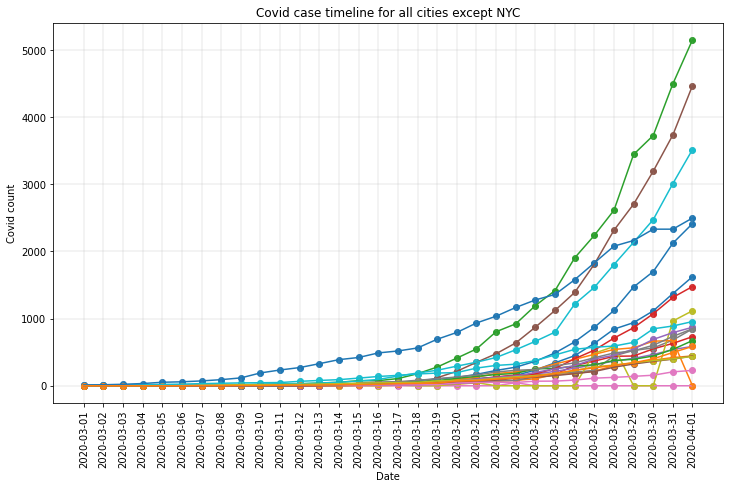

In [11]:
plot_all_cities(exclude_list=['NEW YORK CITY'],title='Covid case timeline for all cities except NYC',x_lab='Date',y_lab='Covid count')
#plot_all_cities(key='flight_all',exclude_list=[],title='Total flight count timeline for all cities',x_lab='Date',y_lab='Flight count')

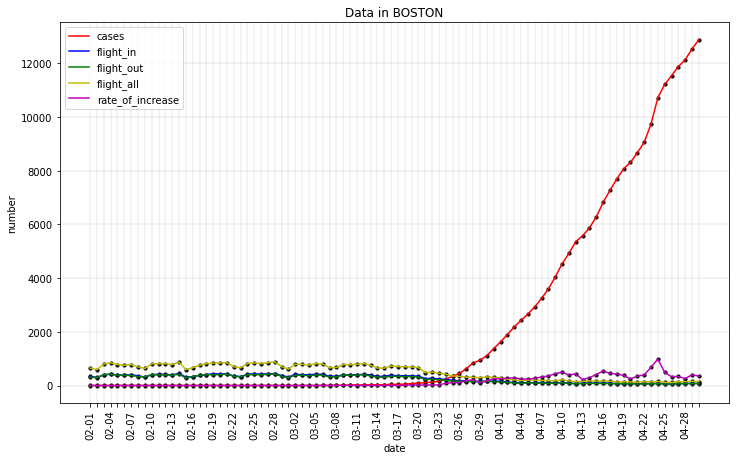

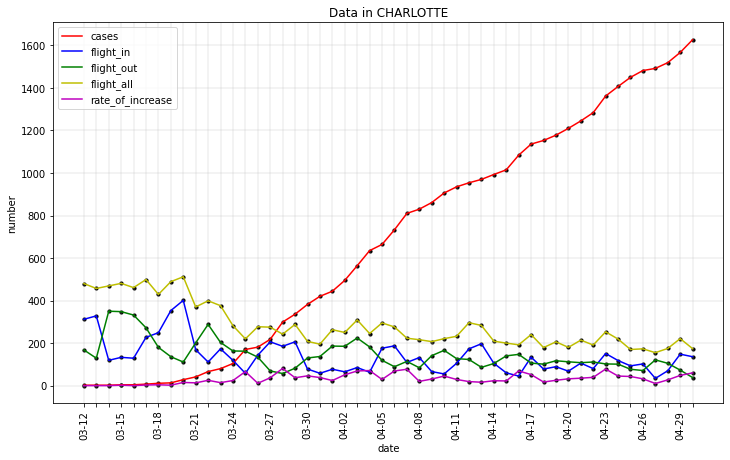

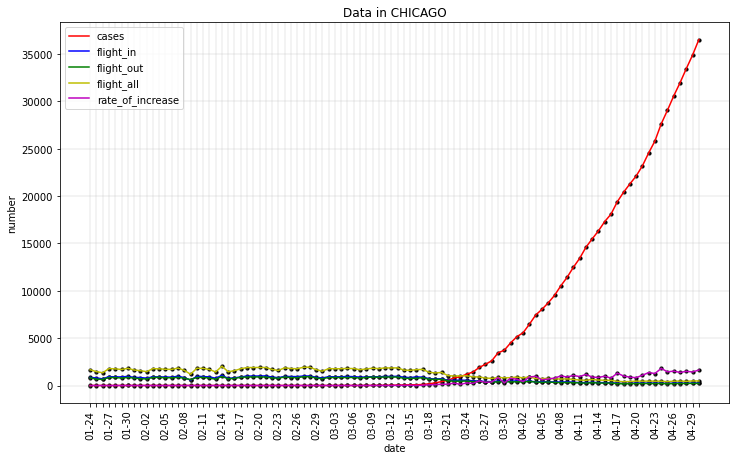

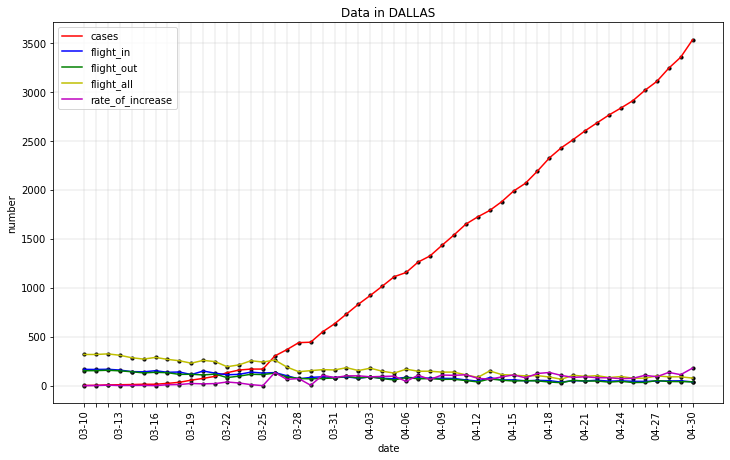

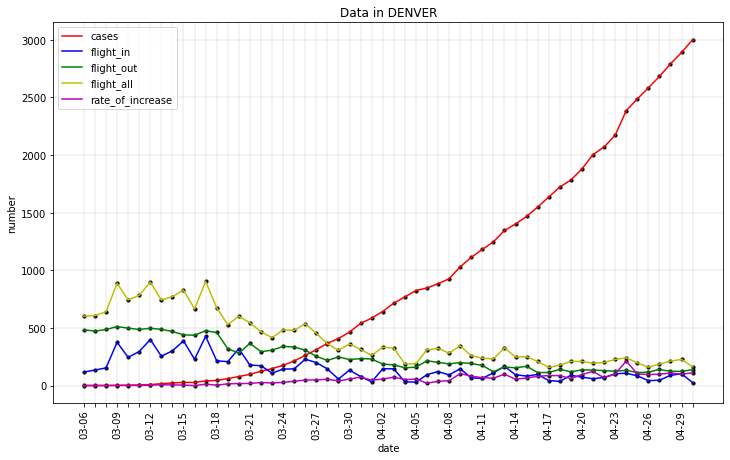

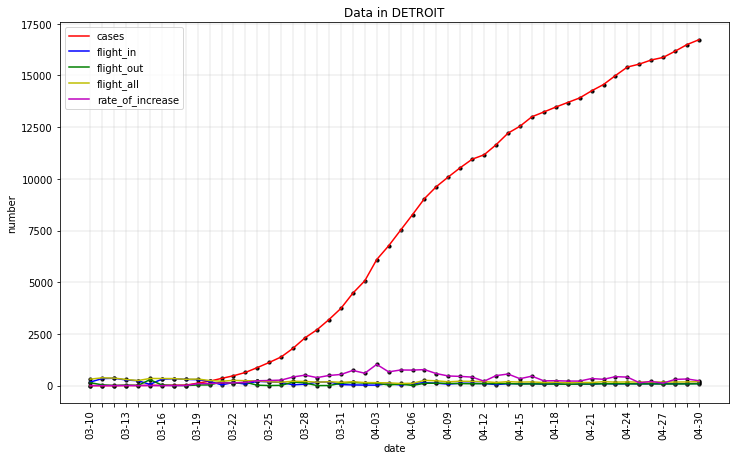

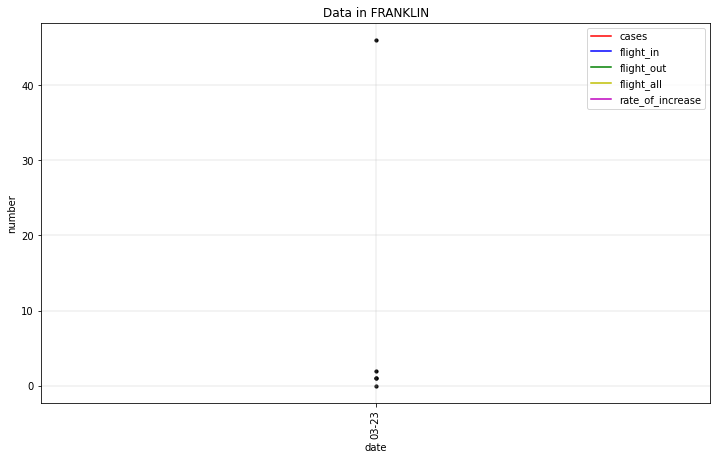

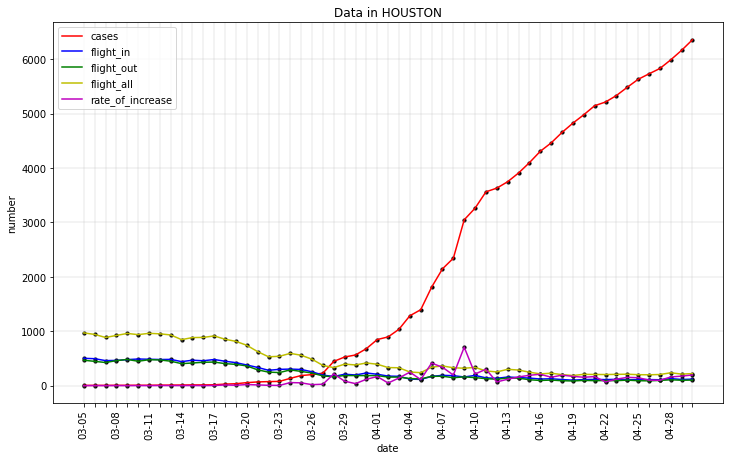

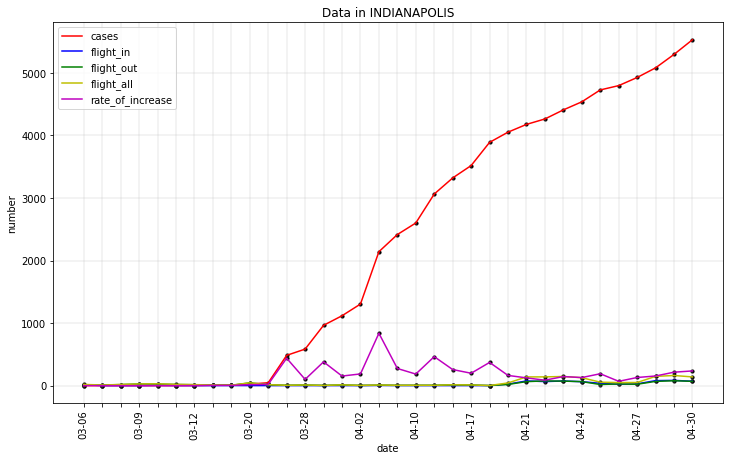

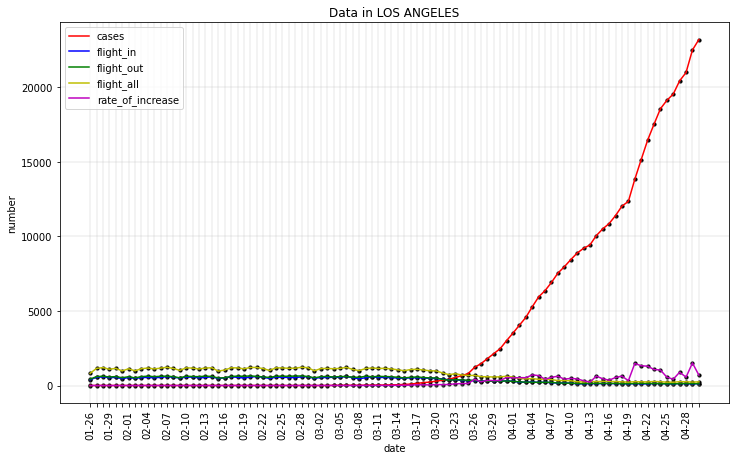

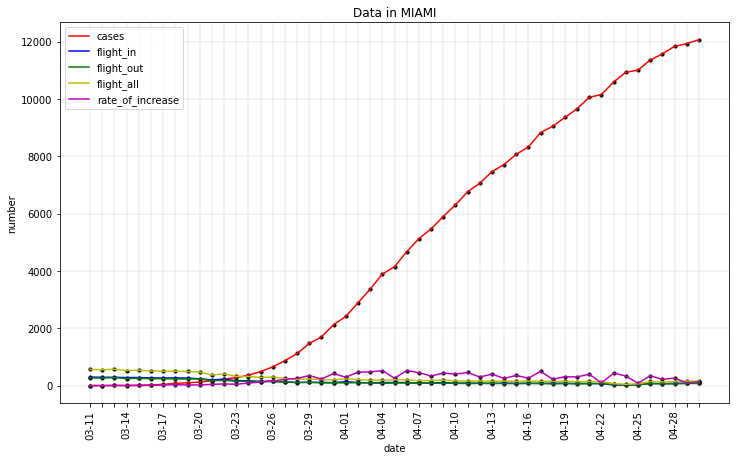

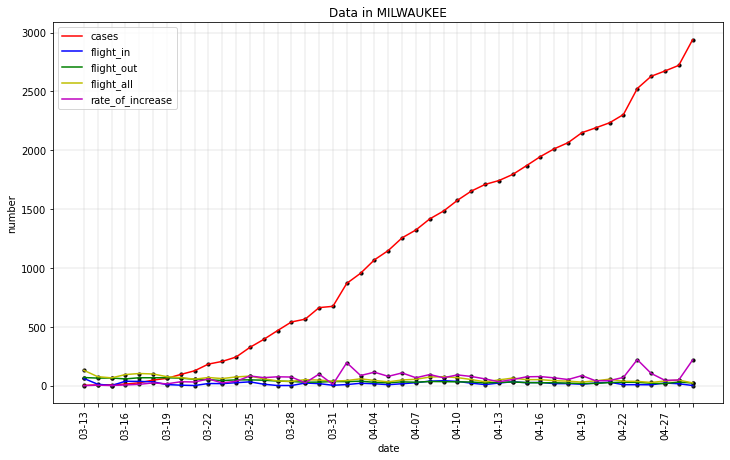

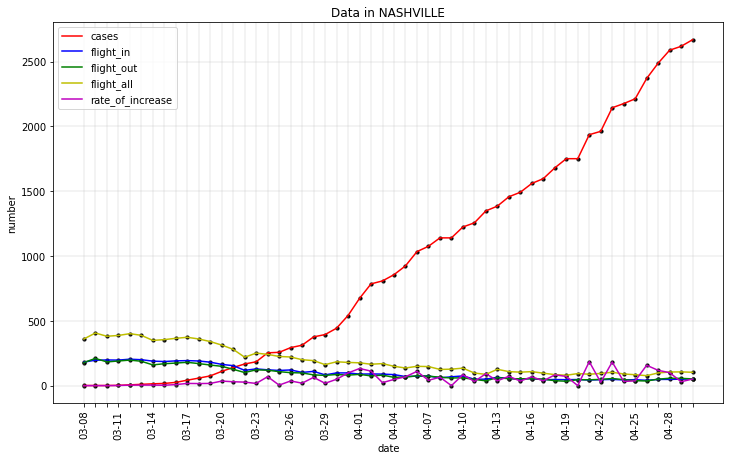

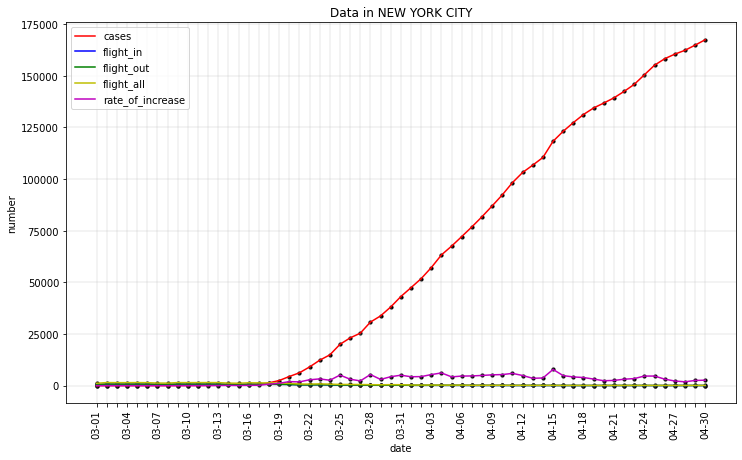

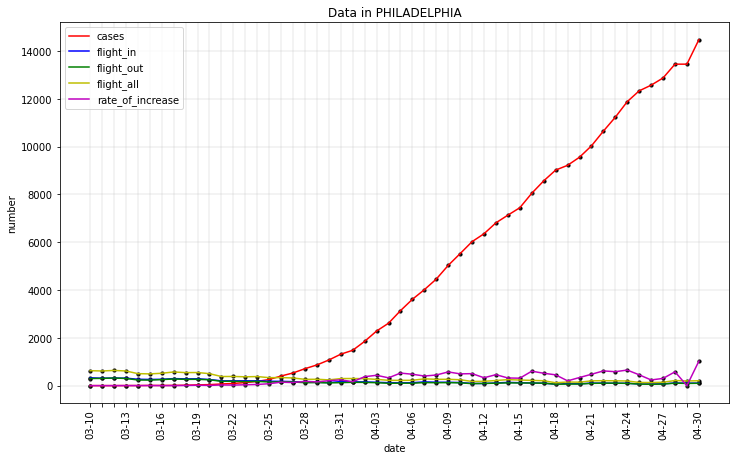

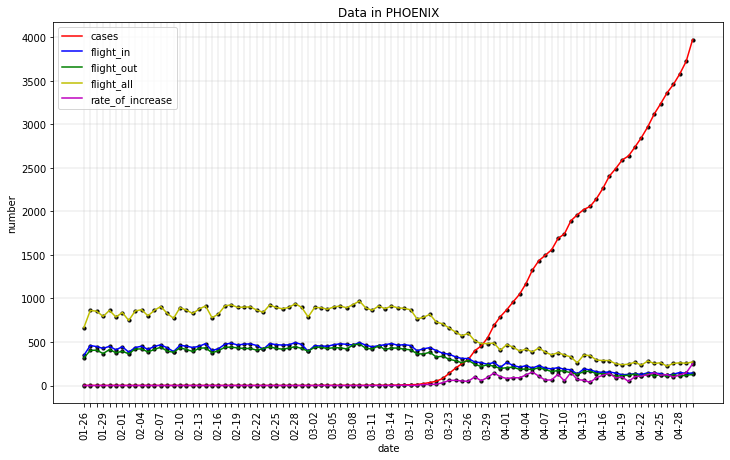

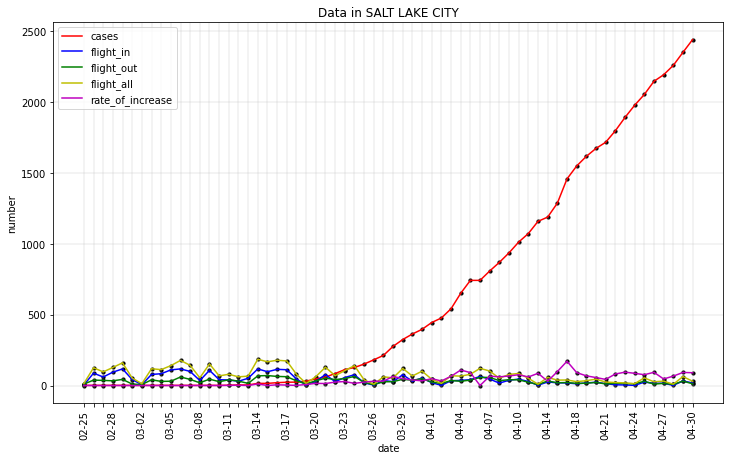

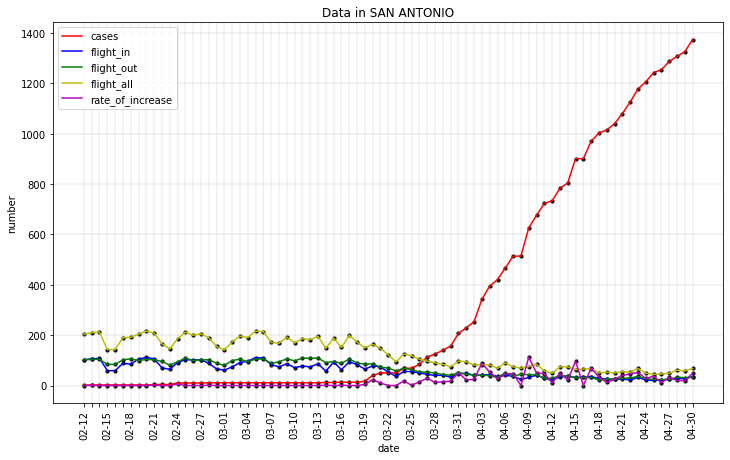

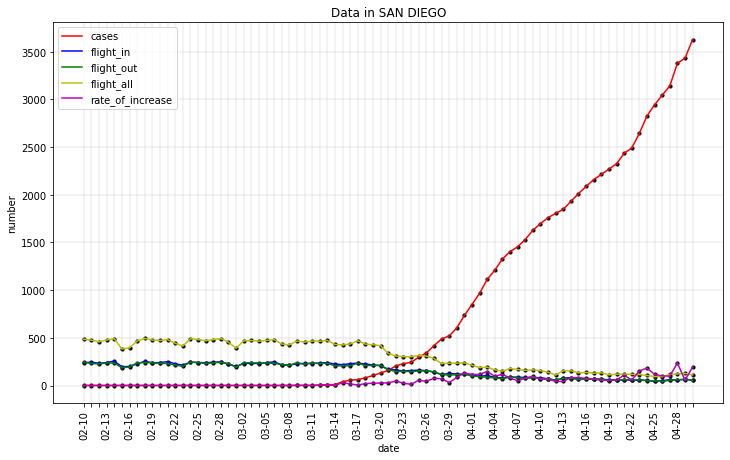

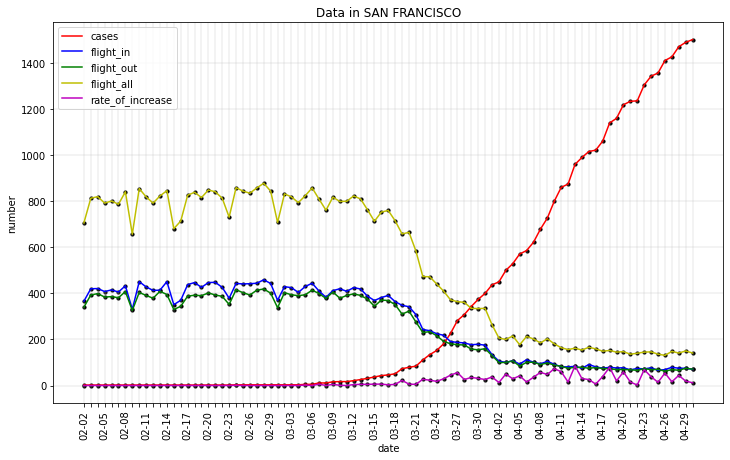

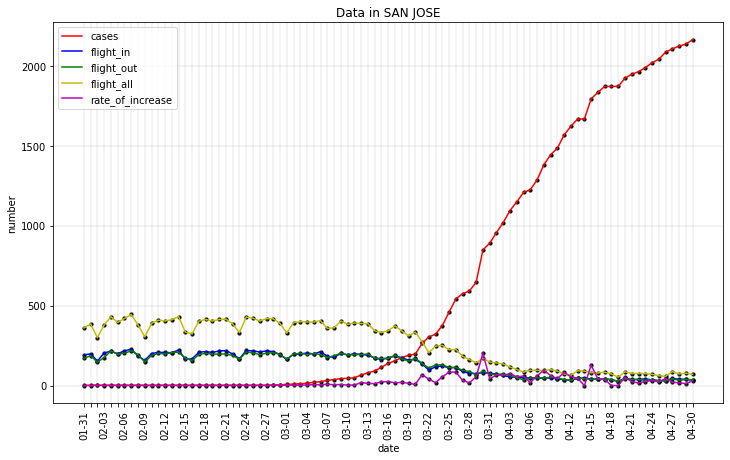

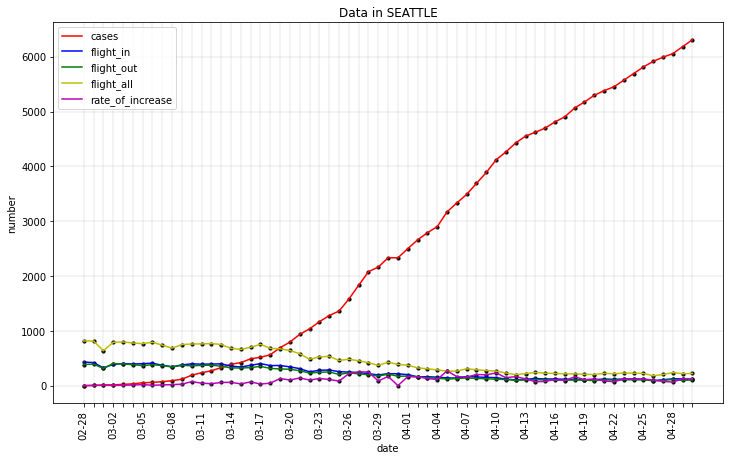

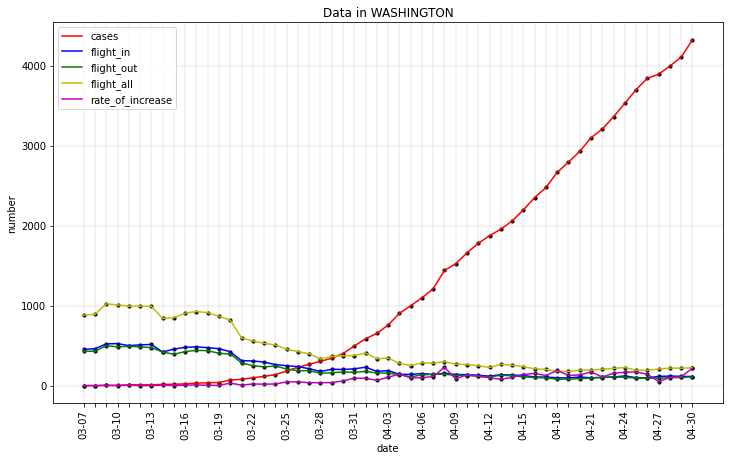

In [12]:
rcParams['figure.figsize'] = 12, 7 #This makes the figure's width 5 inches, and its height 10 inches.

for city_name in city_list:
    get_covid_and_flight_count_for(city_name)
    plot_covid_and_flight_count_for(city_name)

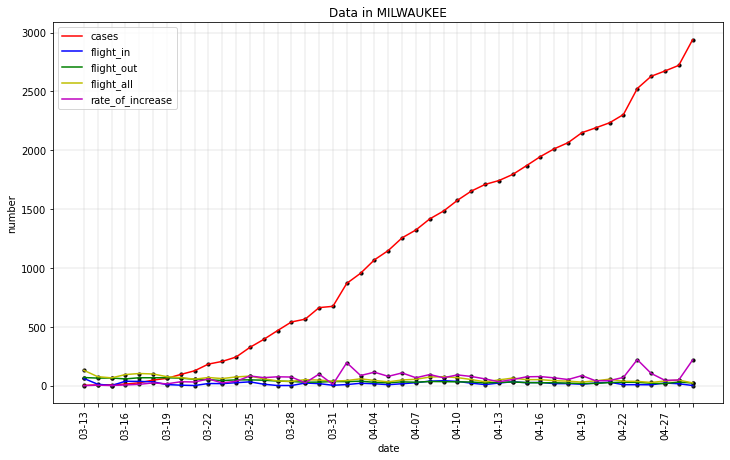

In [13]:
plot_covid_and_flight_count_for('MILWAUKEE')

## Few Obeservations:

1. As the Covid cases increase, the number of flights start going down. 

2. The actual increase in covid for most of the cities starts taking place from 15th to 25th March. To be precise, 17th - 23rd March. Generally, it is during this time period that we observe that the rate of increase graph starts fluctuating.

3. The immediate effect of sudden increase in counts during these dates is that people stop using flights and the first plummet in the flight graph, for most of the cities is seen in the same week.

4. This means that the first 2 weeks of March had a very major role in the spread of the pandemic. This was the time when COVID silently implanted itself in most of the people.

# Analysing Pairwise Covid data 

In [0]:
flight_data = pd.read_csv('https://raw.githubusercontent.com/shantanutrip/covid_flight_analysis/master/Resultant_Data/inter_city_flight_data.csv')

In [0]:
def merge_dates(dates1, dates2):
    lst = list(set(dates1 + dates2))
    lst.sort()
    return lst

In [0]:
def get_daily_count_of_flights_from(city1, city2):
    return flight_data[
        (flight_data['from_city'] == city1) 
        & (flight_data['to_city'] == city2)].groupby('day').count()['from_city']

In [0]:
def get_daily_count_of_flights_for(city, start_day='2020-01-01', end_day='2020-04-30'):
    return flight_data[
        ((flight_data['from_city'] == city) 
        | (flight_data['to_city'] == city))
        & (flight_data['day'] >= start_day)
        & (flight_data['day'] <= end_day)
        ].groupby('day').count()['from_city']

In [18]:
ls = np.array(get_daily_count_of_flights_for('NEW YORK CITY'))
np.average(ls)

1010.404958677686

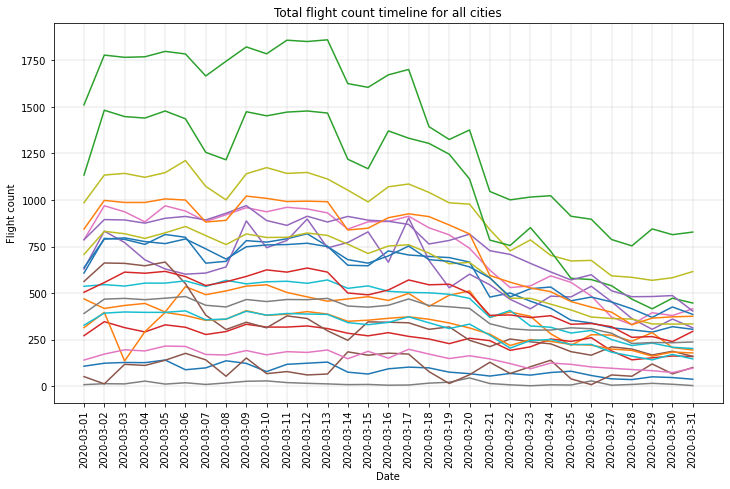

In [19]:
city_flight_averages = {}
dlis = []
X = []
plt.title('Total flight count timeline for all cities')
plt.xlabel('Date')
plt.ylabel('Flight count')
for ci in city_list:
  if ci == 'FRANKLIN':
    continue
  ls = get_daily_count_of_flights_for(ci,start_day='2020-03-01',end_day='2020-03-31')
  dlis = list(ls.index)
  X = [i+1 for i in range(len(dlis))]
  plt.plot(X, np.array(ls))
  city_flight_averages[ci] = {}
  city_flight_averages[ci]['before'] = np.average(np.array(get_daily_count_of_flights_for(ci,start_day='2020-02-01',end_day='2020-03-15')))
  city_flight_averages[ci]['after'] = np.average(np.array(get_daily_count_of_flights_for(ci,start_day='2020-03-16',end_day='2020-04-30')))
  city_flight_averages[ci]['drop_percent'] = ((city_flight_averages[ci]['before'] - city_flight_averages[ci]['after']) * 100)/city_flight_averages[ci]['before']
plt.xticks(X, dlis, rotation=90)
plt.grid(linewidth=0.3)
plt.show()

In [20]:
city_flight_averages

{'BOSTON': {'after': 272.6521739130435,
  'before': 758.0909090909091,
  'drop_percent': 64.03436967210123},
 'CHARLOTTE': {'after': 264.9782608695652,
  'before': 465.8181818181818,
  'drop_percent': 43.11551776804807},
 'CHICAGO': {'after': 753.5434782608696,
  'before': 1732.5227272727273,
  'drop_percent': 56.505997503012864},
 'DALLAS': {'after': 150.91304347826087,
  'before': 303.8863636363636,
  'drop_percent': 50.338988011042716},
 'DENVER': {'after': 330.4782608695652,
  'before': 733.5,
  'drop_percent': 54.9450223763374},
 'DETROIT': {'after': 194.2608695652174,
  'before': 552.7954545454545,
  'drop_percent': 64.85845388780345},
 'HOUSTON': {'after': 372.69565217391306,
  'before': 912.2954545454545,
  'drop_percent': 59.147483381948206},
 'INDIANAPOLIS': {'after': 33.69565217391305,
  'before': 15.613636363636363,
  'drop_percent': -115.80912600468326},
 'LOS ANGELES': {'after': 471.0217391304348,
  'before': 1126.8181818181818,
  'drop_percent': 58.198958205447504},
 'MI

In [0]:
before_list = []
after_list = []
drop_list = []
city_name_list = []
for city in city_flight_averages:
  before_list.append(city_flight_averages[city]['before'])
  after_list.append(city_flight_averages[city]['after'])
  drop_list.append(city_flight_averages[city]['drop_percent'])
  city_name_list.append(city)

In [22]:
before_list, after_list

([758.0909090909091,
  465.8181818181818,
  1732.5227272727273,
  303.8863636363636,
  733.5,
  552.7954545454545,
  912.2954545454545,
  15.613636363636363,
  1126.8181818181818,
  566.4090909090909,
  118.02272727272727,
  370.3636363636364,
  1421.7727272727273,
  582.4090909090909,
  876.0681818181819,
  87.88636363636364,
  182.95454545454547,
  456.6818181818182,
  802.7954545454545,
  387.02272727272725,
  769.3181818181819,
  953.9318181818181],
 [272.6521739130435,
  264.9782608695652,
  753.5434782608696,
  150.91304347826087,
  330.4782608695652,
  194.2608695652174,
  372.69565217391306,
  33.69565217391305,
  471.0217391304348,
  223.15217391304347,
  51.54347826086956,
  163.41304347826087,
  389.39130434782606,
  272.4782608695652,
  430.5217391304348,
  59.23913043478261,
  85.6304347826087,
  205.3913043478261,
  283.60869565217394,
  140.56521739130434,
  344.5217391304348,
  361.7391304347826])

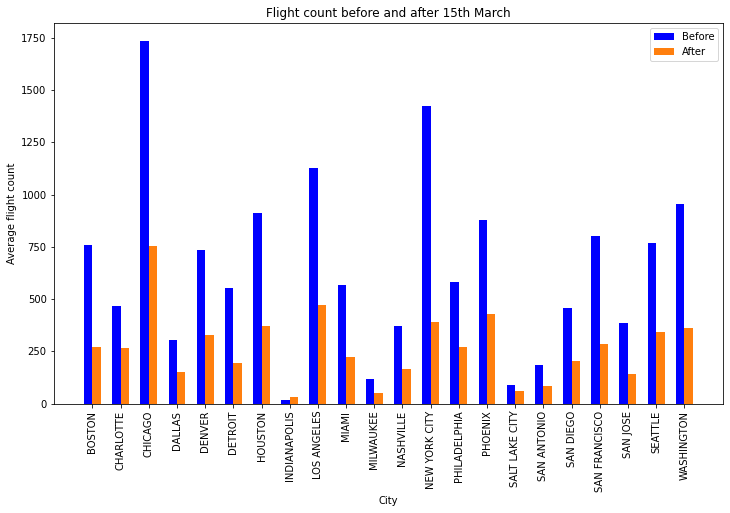

In [23]:
X = np.array([i+1 for i in range(len(city_name_list))])
w = 0.3
ax1 = plt.subplot(1,1,1)
plt.xticks(X + w/2, city_name_list, rotation='vertical')
bef = ax1.bar(X, before_list, width=w, color='b', align='center')
af = ax1.bar(X + w, after_list, width=w, color='tab:orange', align='center')
plt.ylabel('Average flight count')
plt.xlabel('City')
plt.title('Flight count before and after 15th March')
plt.legend([bef, af],['Before', 'After'])
plt.show()

In [24]:
print('City' + ' ' * 21 + 'Percentage Drop')
print('------'  + ' ' * 19 + '------')
for i,cname in enumerate(city_name_list):
  print(cname + ' ' * (25 - len(cname)) + str(drop_list[i]))

City                     Percentage Drop
------                   ------
BOSTON                   64.03436967210123
CHARLOTTE                43.11551776804807
CHICAGO                  56.505997503012864
DALLAS                   50.338988011042716
DENVER                   54.9450223763374
DETROIT                  64.85845388780345
HOUSTON                  59.147483381948206
INDIANAPOLIS             -115.80912600468326
LOS ANGELES              58.198958205447504
MIAMI                    60.60229655656081
MILWAUKEE                56.32749771850065
NASHVILLE                55.87767603679751
NEW YORK CITY            72.61226798921905
PHILADELPHIA             53.21531460914357
PHOENIX                  50.857507661454505
SALT LAKE CITY           32.595765732339416
SAN ANTONIO              53.19578719956792
SAN DIEGO                55.02529416092192
SAN FRANCISCO            64.67235906153029
SAN JOSE                 63.68037133585418
SEATTLE                  55.2172628604457
WASHINGTON        

In [0]:
#https://towardsdatascience.com/dynamic-time-warping-3933f25fcdd
def dynamic_time_warping(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix, dtw_matrix[n][m]

In [0]:
def get_geodesic_distance_between_cities(city1, city2):
    c1 = (city_details[city1]['latitude'], city_details[city1]['longitude'])
    c2 = (city_details[city2]['latitude'], city_details[city2]['longitude'])
    return geodesic(c1, c2).miles

In [0]:
def get_city_datewise_merged_data(city1, city2):
    flight_data_1_to_2 = get_daily_count_of_flights_from(city1, city2)
    flight_data_2_to_1 = get_daily_count_of_flights_from(city2, city1)
    flight_data_1_to_2_date_list = list(flight_data_1_to_2.index)
    flight_data_2_to_1_date_list = list(flight_data_2_to_1.index)
    
    merged_dates = []
    merged_dates = merge_dates(merged_dates, covid_flight_count_data[city1]['all_dates'])
    merged_dates = merge_dates(merged_dates, covid_flight_count_data[city2]['all_dates'])
    merged_dates = merge_dates(merged_dates, flight_data_1_to_2_date_list)
    merged_dates = merge_dates(merged_dates, flight_data_2_to_1_date_list)
    
    ret_data = {}
    total_dates = len(merged_dates)
    ret_data['dates'] = merged_dates
    ret_data['city1_covid'] = [0] * total_dates
    ret_data['city2_covid'] = [0] * total_dates
    ret_data['city1_roi'] = [0] * total_dates
    ret_data['city2_roi'] = [0] * total_dates
    ret_data['flight1_2'] = [0] * total_dates
    ret_data['flight2_1'] = [0] * total_dates
    ret_data['total_flight'] = [0] * total_dates
    ret_data['city1'] = city1
    ret_data['city2'] = city2
    ret_data['dtw'] = -1
    ret_data['dtw_matrix'] = -1
    ret_data['geodesy_distance'] = get_geodesic_distance_between_cities(city1, city2)
    
    indx = 0
    for day in merged_dates:
        if day in covid_flight_count_data[city1]['all_dates']:
            indx2 = covid_flight_count_data[city1]['all_dates'].index(day)
            ret_data['city1_covid'][indx] = covid_flight_count_data[city1]['total_num'][indx2]
            ret_data['city1_roi'][indx] = covid_flight_count_data[city1]['rate_of_increase'][indx2]
                                                                     
        if day in covid_flight_count_data[city2]['all_dates']:
            indx2 = covid_flight_count_data[city2]['all_dates'].index(day)
            ret_data['city2_covid'][indx] = covid_flight_count_data[city2]['total_num'][indx2]
            ret_data['city2_roi'][indx] = covid_flight_count_data[city2]['rate_of_increase'][indx2]
        
        if day in flight_data_1_to_2_date_list:
            indx2 = flight_data_1_to_2_date_list.index(day)
            ret_data['flight1_2'][indx] = flight_data_1_to_2[indx2]
            ret_data['total_flight'][indx] += flight_data_1_to_2[indx2]
        
        if day in flight_data_2_to_1_date_list:
            indx2 = flight_data_2_to_1_date_list.index(day)
            ret_data['flight2_1'][indx] = flight_data_2_to_1[indx2]
            ret_data['total_flight'][indx] += flight_data_2_to_1[indx2]
        
        indx += 1
    
    ret_data['dtw_matrix'], ret_data['dtw'] = dynamic_time_warping(ret_data['city1_covid'], ret_data['city2_covid'])
#     if (1 + ret_data['dtw'] != 0):
#         ret_data['dtw'] = (1.0 / (1 + ret_data['dtw'])) * 100000000
    return ret_data

### Get pairwise city data - takes some time (1-2 mins)

In [0]:
pairwise_city_data = {}
total_cities = len(city_list)
for i in range(0,total_cities):
    city1 = city_list[i]
    for j in range(i + 1,total_cities):
        city2 = city_list[j]
        if(city1 not in pairwise_city_data):
            pairwise_city_data[city1] = {}
        if(city2 not in pairwise_city_data):
            pairwise_city_data[city2] = {}
        pairwise_city_data[city1][city2] = get_city_datewise_merged_data(city1, city2)
        pairwise_city_data[city2][city1] = pairwise_city_data[city1][city2]

In [0]:
def plot_single_city_on_merged_city_graph(city, color):
    X = [i+1 for i in range(covid_flight_count_data[city]['count'])]
    plt.plot(X, covid_flight_count_data[city]['total_num'], color, label=city + ' cases')

In [0]:
def plot_merged_cities(city1, city2):
    citywise_merged_data = None
    if (city1 not in pairwise_city_data or city2 not in pairwise_city_data[city1]):
        citywise_merged_data = get_city_datewise_merged_data(city1, city2)
    else:
        citywise_merged_data = pairwise_city_data[city1][city2]
    count = len(citywise_merged_data['dates'])
    X = [i+1 for i in range(count)]
    merged_dates = [m[5:] if indx % 4 == 0 else '' for indx, m in enumerate(citywise_merged_data['dates'])]
    
    plt.title("Covid data of " + city1 + " and " + city2)
    plt.xlabel("date")
    plt.ylabel("number")
    plt.plot(X, citywise_merged_data['city1_covid'], 'r', label = city1 + ' cases')
    plt.plot(X, citywise_merged_data['city2_covid'], 'g', label = city2 + ' cases')
    plt.scatter(X, citywise_merged_data['city1_covid'], marker='o', color='black', s=10)
    plt.scatter(X, citywise_merged_data['city2_covid'], marker='o', color='black', s=10)
    plt.grid(linewidth=0.3)
    plt.xticks(X, merged_dates, rotation=90)
    plt.legend()
    plt.show()
    
    plt.title("Rate of increase data of " + city1 + " and " + city2)
    plt.xlabel("date")
    plt.ylabel("number")
    plt.plot(X, citywise_merged_data['city1_roi'], 'r', label = city1 + ' rate of increase')
    plt.plot(X, citywise_merged_data['city2_roi'], 'g', label = city2 + ' rate of increase')
    plt.scatter(X, citywise_merged_data['city1_roi'], marker='o', color='black', s=10)
    plt.scatter(X, citywise_merged_data['city2_roi'], marker='o', color='black', s=10)
    plt.grid(linewidth=0.3)
    plt.xticks(X, merged_dates, rotation=90)
    plt.legend()
    plt.show()
    
    plt.title("Flight data between " + city1 + " and " + city2)
    plt.xlabel("date")
    plt.ylabel("number")
    plt.plot(X, citywise_merged_data['flight1_2'], 'b', label = 'flight from ' + city1 + ' to ' + city2)
    plt.plot(X, citywise_merged_data['flight2_1'], 'g', label = 'flight from ' + city2 + ' to ' + city1)
    plt.plot(X, citywise_merged_data['total_flight'], 'y', label = 'total flights between both')
    plt.scatter(X, citywise_merged_data['flight1_2'], marker='o', color='black', s=10)
    plt.scatter(X, citywise_merged_data['flight2_1'], marker='o', color='black', s=10)
    plt.scatter(X, citywise_merged_data['total_flight'], marker='o', color='black', s=10)
    plt.grid(linewidth=0.3)
    plt.xticks(X, merged_dates, rotation=90)
    plt.legend()
    plt.show()
    
    print('The dtw distance between both the covid graphs ' + str(citywise_merged_data['dtw']))
    print('The geodesy distance between both the cities ' + str(citywise_merged_data['geodesy_distance']))

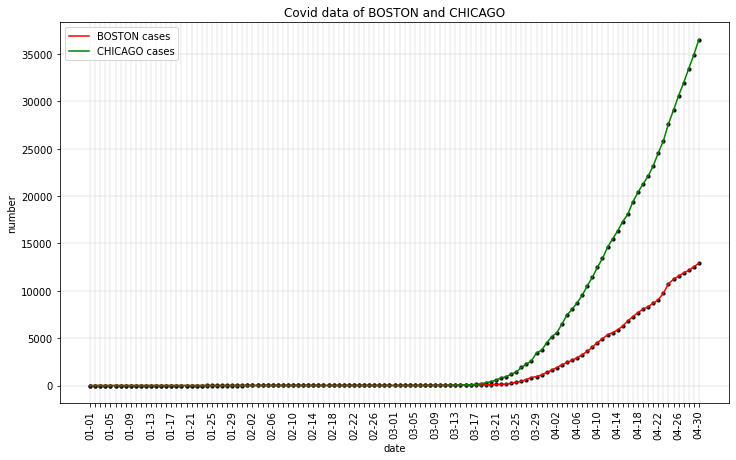

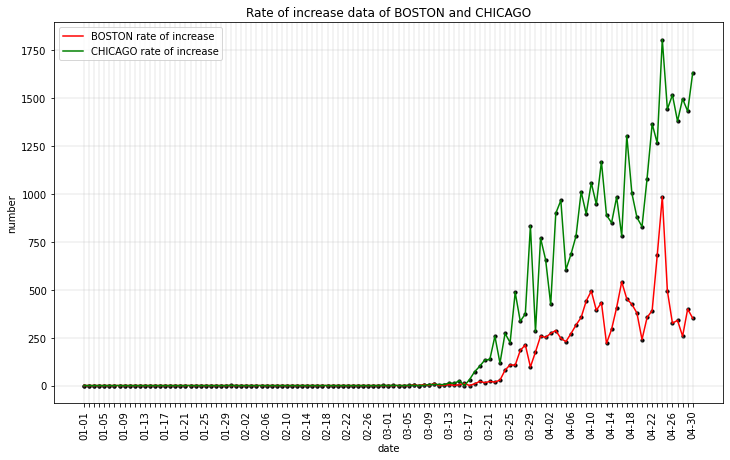

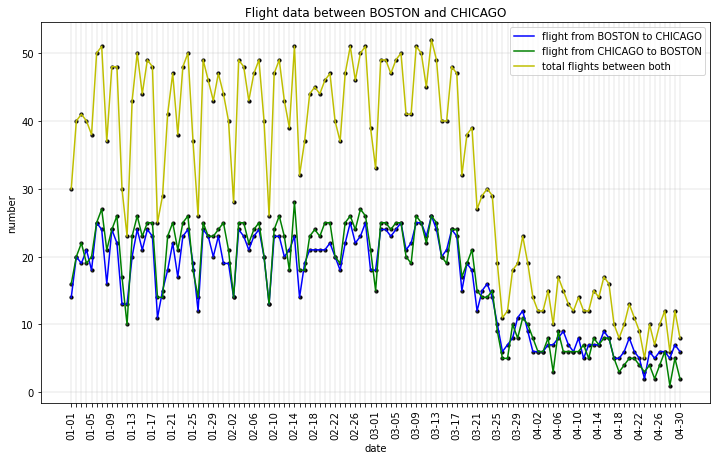

The dtw distance between both the covid graphs 224165.0
The geodesy distance between both the cities 850.5760908862097


In [31]:
plot_merged_cities('BOSTON','CHICAGO')

In [0]:
def get_first_index_with_value_greater_than(lst, val):
    for i,v in enumerate(lst):
        if v >= val:
            return i
    return -1

In [0]:
def get_plot_data_for_each_city_pair(exclude_city_list = [], similarity_threshold = -1, fl_threshold = -1, begin_day_covid_threshold = 2000, avoid_disconnected=False):
    dtw_list = []
    flight_list = []
    geodesy_distance_list = []
    aroi_list = []
    name_list = []
    begin_day_difference_list = []
    total_cities = len(city_list)
    for i in range(0,total_cities):
        city1 = city_list[i]
        if (city1 in exclude_city_list):
            continue
        for j in range(i + 1,total_cities):
            city2 = city_list[j]
            if (city2 in exclude_city_list):
                continue
            if similarity_threshold >= 0 and pairwise_city_data[city1][city2]['dtw'] > similarity_threshold:
                continue
            flight_avg = np.average(pairwise_city_data[city1][city2]['total_flight'])
            if fl_threshold >= 0 and flight_avg > fl_threshold:
                continue
            if avoid_disconnected and flight_avg == 0:
                continue
            dtw_list.append(pairwise_city_data[city1][city2]['dtw'])
            flight_list.append(flight_avg)
            geodesy_distance_list.append(pairwise_city_data[city1][city2]['geodesy_distance'])
            aroi_c1 = np.average(covid_flight_count_data[city1]['rate_of_increase'])
            aroi_c2 = np.average(covid_flight_count_data[city2]['rate_of_increase'])
            bd1_indx = get_first_index_with_value_greater_than(covid_flight_count_data[city1]['total_num'], begin_day_covid_threshold)
            bd2_indx = get_first_index_with_value_greater_than(covid_flight_count_data[city2]['total_num'], begin_day_covid_threshold)
            bd1 = covid_flight_count_data[city1]['all_dates'][bd1_indx]
            bd2 = covid_flight_count_data[city2]['all_dates'][bd2_indx]
            bd1_date = datetime.strptime(bd1, '%Y-%m-%d')
            bd2_date = datetime.strptime(bd2, '%Y-%m-%d')
            begin_day_difference_list.append(abs((bd1_date-bd2_date).days))
            aroi_list.append(abs(aroi_c1 - aroi_c2))
            name_list.append(str(i)+','+str(j))
    return dtw_list, flight_list, geodesy_distance_list, name_list, aroi_list, begin_day_difference_list

In [0]:
def get_data_for_heat_map(x_list, y_list, x_weight = 1, y_weight = 1):
    x_max = np.max(x_list)
    y_max = np.max(y_list)
    x_len = int(x_max / x_weight) + 1
    y_len = int(y_max / y_weight) + 1
    a = np.zeros((y_len, x_len))
    for i, x_val in enumerate(x_list):
        rw = int(y_list[i] / y_weight)
        cl = int(x_list[i] / x_weight)
        a[rw][cl] += 1
    x_lab = [str(i * x_weight) + '-' + str((i + 1) * x_weight - 1) for i in range(0,x_len)]
    y_lab = [str(i * y_weight) + '-' + str((i + 1) * y_weight - 1) for i in range(0,y_len)]
    return a, x_lab, y_lab

In [0]:
def create_heat_map(x_list, y_list, x_weight, y_weight, x_lab = '', y_lab = '', plot_title = ''):
    ret, x_axis_labels_heatmap, y_axis_labels_heatmap = get_data_for_heat_map(x_list, y_list, x_weight, y_weight)
    ax = sns.heatmap(ret, xticklabels=x_axis_labels_heatmap, yticklabels=y_axis_labels_heatmap,linewidth=0.5)
    plt.title(plot_title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.yticks(rotation=0) 
    plt.show()

In [0]:
def set_plot_precision(max_val, increment_val):
    plt.ylim((0, max_val))
    plt.yticks(range(0,max_val, increment_val))

In [0]:
def create_scatter_plot(x, y, name, x_lab = '', y_lab = '', plot_title = '', plot_annotation = False):
    plt.title(plot_title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.scatter(x, y)
    plt.show()
    
    if (plot_annotation):
        plt.title(plot_title)
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        plt.scatter(x, y)
        for i, txt in enumerate(name):
            plt.annotate(txt, (x[i], y[i]))
        plt.show()

In [0]:
def train_and_plot_regression(x_inp, y_inp, degree_of_model = 2, x_lab = '', y_lab = '', plot_title = ''):
    rcParams['figure.figsize'] = 12, 7
    plt.title(plot_title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    X = np.array(x_inp).reshape(np.array(x_inp).shape[0], 1)
    max_x = (int(np.max(x_inp)/10) + 1) * 10
    vector = np.array(y_inp)
    predict = np.array(range(0,max_x,1))
    predict = predict.reshape(predict.shape[0], 1)
    #Edit: added second square bracket above to fix the ValueError problem

    poly = PolynomialFeatures(degree = degree_of_model)
    plt.scatter(X, vector)
    X_ = poly.fit_transform(X)
    predict_ = poly.fit_transform(predict)

    clf = linear_model.LinearRegression()
    clf.fit(X_, vector)
    prediction = clf.predict(predict_)
    plt.plot(predict, prediction,'r')
    plt.show()
    print(stats.pearsonr(x_inp,y_inp))

In [0]:
def normalise_data(inp):
    lst = np.array(inp)
    sm = np.sqrt(np.sum(lst ** 2))
    return lst/sm

In [40]:
1 - normalise_data([2,2,2,2])

array([0.5, 0.5, 0.5, 0.5])

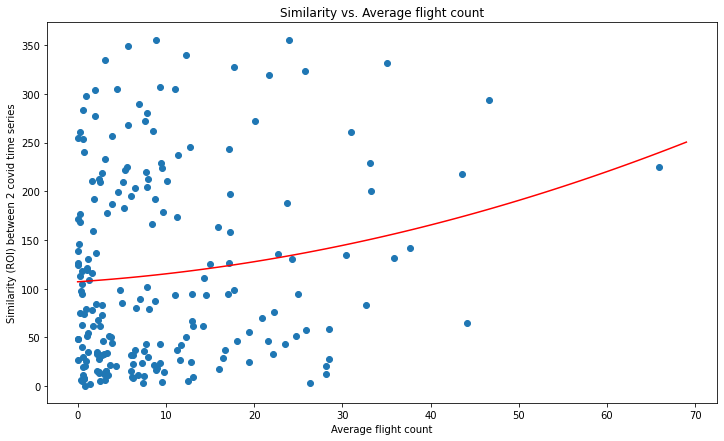

(0.15308973237170184, 0.028031391525915605)


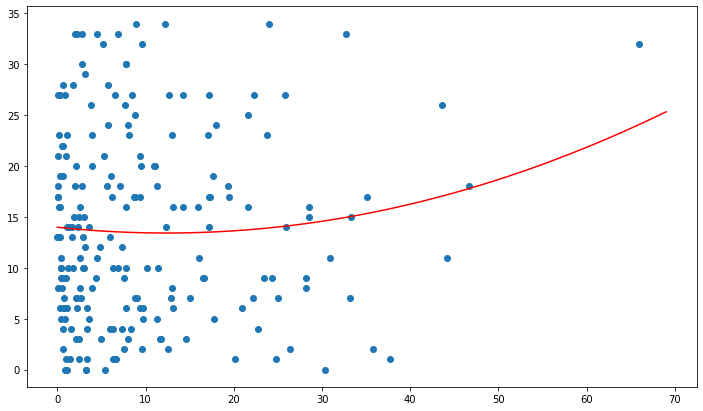

(0.05942418273148254, 0.3961831141076008)


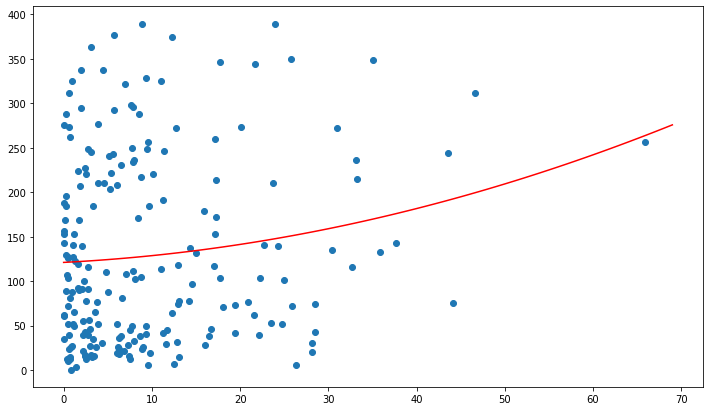

(0.1498730143516713, 0.03154316950561562)


In [41]:
dl, fl, gdl, nl, aroi, bddl = get_plot_data_for_each_city_pair(exclude_city_list = ['NEW YORK CITY'],begin_day_covid_threshold=2000,avoid_disconnected=True)
sl = 1 - normalise_data(dl)
#set_plot_precision(0.0025, 0.00025)
#create_scatter_plot(fl, sl, nl, 'Average flight count', 'Similarity between 2 covid time series', 'Similarity between 2 covid time series Vs. Average Flight Count')
#create_heat_map(fl, dl, 10, 0.00025, 'Average flight count', 'Distance (dissimilarity) between 2 covid time series', 'Distance (dissimilarity) between 2 covid time series Vs. Average Flight Count')
#create_scatter_plot(gdl, sl, nl, 'Geo distance between 2 places (miles)', 'Similarity between 2 covid time series', 'Similarity between 2 covid time series vs. Geo distance (miles)')
#train_and_plot_regression(fl,sl,2,'Average flight count', 'Similarity between 2 covid time series', 'Similarity between 2 covid time series Vs. Average Flight Count')
#train_and_plot_regression(gdl,sl,2, 'Geo distance between 2 places (miles)', 'Similarity between 2 covid time series', 'Similarity between 2 covid time series vs. Geo distance (miles)')
#train_and_plot_regression(gdl,fl,2, 'Geo distance between 2 places (miles)', 'Average flight count between 2 places', 'Average flight count vs. Geo distance (miles)')
train_and_plot_regression(fl, aroi,2,'Average flight count','Similarity (ROI) between 2 covid time series','Similarity vs. Average flight count')
train_and_plot_regression(fl,bddl,2)
train_and_plot_regression(fl,np.array(bddl) + np.array(aroi),2)
#train_and_plot_regression(fl,0.2 * normalise_data(bddl) + 0.8 * normalise_data(aroi),2)
#create_scatter_plot(gdl, fl, nl, 'Geo distance between 2 places (miles)', 'Average flight count between 2 places', 'Average flight count vs. Geo distance (miles)')

### Remove highly dissimiral values. Take the values which have dissimilarity less than 5000

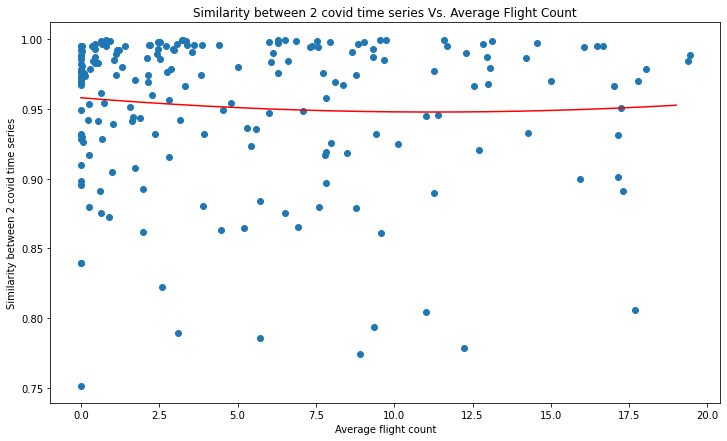

(-0.05735382752783157, 0.42102685475606544)


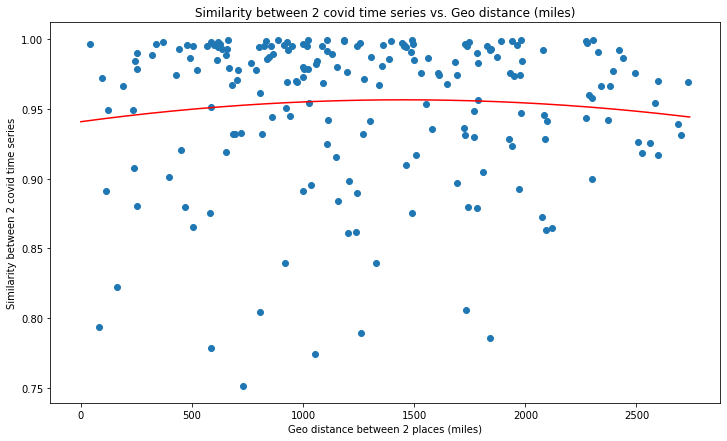

(0.01592994876722281, 0.8232879404752772)


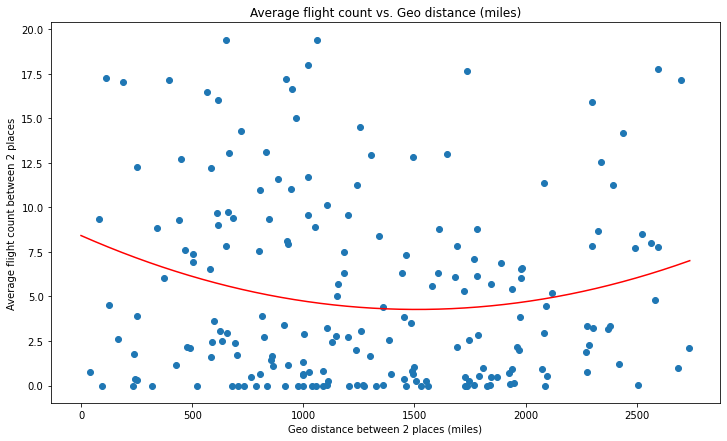

(-0.06669909988036099, 0.34926183950315226)


In [42]:
dl, fl, gdl, nl, aroi, bddl = get_plot_data_for_each_city_pair(exclude_city_list = ['NEW YORK CITY'], fl_threshold = 20)
sl = 1 - normalise_data(dl)
#create_scatter_plot(fl, dl, nl, 'Average flight count', 'Distance (dissimilarity) between 2 covid time series', 'Distance (dissimilarity) between 2 covid time series Vs. Average Flight Count')
#create_heat_map(fl, dl, 10, 25000, 'Average flight count', 'Distance (dissimilarity) between 2 covid time series', 'Distance (dissimilarity) between 2 covid time series Vs. Average Flight Count')
#create_scatter_plot(gdl, dl, nl, 'Geo distance between 2 places (miles)', 'Distance (dissimilarity) between 2 covid time series', 'Distance (dissimilarity) between 2 covid time series vs. Geo distance (miles)')
train_and_plot_regression(fl,sl,2,'Average flight count', 'Similarity between 2 covid time series', 'Similarity between 2 covid time series Vs. Average Flight Count')
train_and_plot_regression(gdl,sl,2, 'Geo distance between 2 places (miles)', 'Similarity between 2 covid time series', 'Similarity between 2 covid time series vs. Geo distance (miles)')
train_and_plot_regression(gdl,fl,2, 'Geo distance between 2 places (miles)', 'Average flight count between 2 places', 'Average flight count vs. Geo distance (miles)')
#create_scatter_plot(gdl, fl, nl, 'Geo distance between 2 places (miles)', 'Average flight count between 2 places', 'Average flight count vs. Geo distance (miles)')

In [0]:
def plot_flight_max_covid_max(degree=1):
    f = []
    c = []
    for cit in covid_flight_count_data:
        if (np.max(covid_flight_count_data[cit]['total_num']) > 100000):
          continue
        f.append(np.max(covid_flight_count_data[cit]['flight_all']))
        c.append(np.max(covid_flight_count_data[cit]['total_num']))
    print("Pearson's correlation: " + str(stats.pearsonr(f,c)))
    train_and_plot_regression(f,c,degree,'Max Flight Count','Max Covid cases','Max Covid cases Vs. Max Flight count')

In [0]:
def plot_flight_max_covid_avg(degree=1):
    f = []
    c = []
    for cit in covid_flight_count_data:
        if (np.max(covid_flight_count_data[cit]['total_num']) > 100000):
          continue
        f.append(np.average(covid_flight_count_data[cit]['flight_all']))
        c.append(np.max(covid_flight_count_data[cit]['total_num']))
    print("Pearson's correlation: " + str(stats.pearsonr(f,c)))
    train_and_plot_regression(f,c,degree,'Avg Flight Count','Max Covid cases','Max Covid cases Vs. Avg Flight')

In [0]:
def plot_flight_max_covid_min(degree=1):
    f = []
    c = []
    for cit in covid_flight_count_data:
        if (np.max(covid_flight_count_data[cit]['total_num']) > 100000):
          continue
        f.append(np.min(covid_flight_count_data[cit]['flight_all']))
        c.append(np.max(covid_flight_count_data[cit]['total_num']))
    print("Pearson's correlation: " + str(stats.pearsonr(f,c)))
    train_and_plot_regression(f,c,degree,'Min Flight Count','Max Covid cases','Max Covid cases  Vs. Min Flight count')

Pearson's correlation: (0.7106653408308138, 0.0002100367804321452)


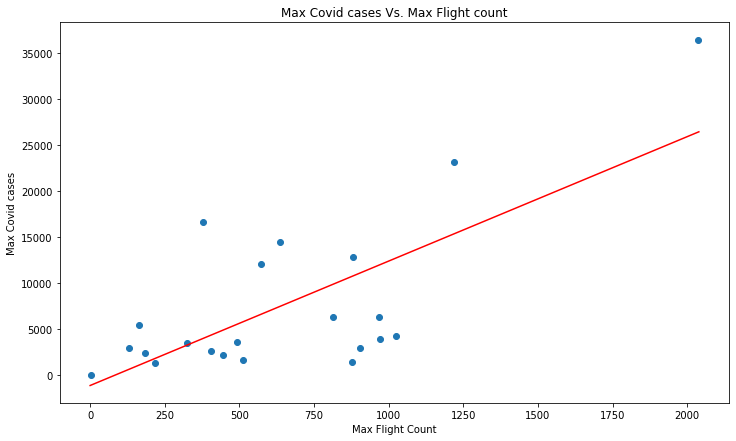

(0.7106653408308138, 0.0002100367804321452)


In [46]:
plot_flight_max_covid_max(1)

Pearson's correlation: (0.7352118186107882, 9.695820611351046e-05)


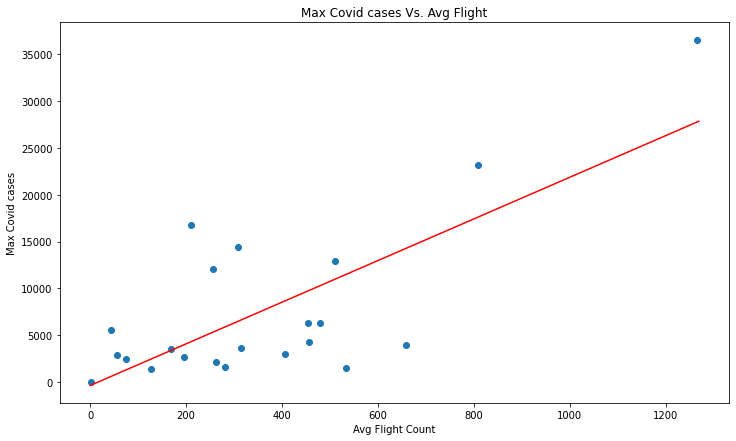

(0.7352118186107882, 9.695820611351046e-05)


In [47]:
plot_flight_max_covid_avg(1)

Pearson's correlation: (0.6702767525665039, 0.0006418364347072213)


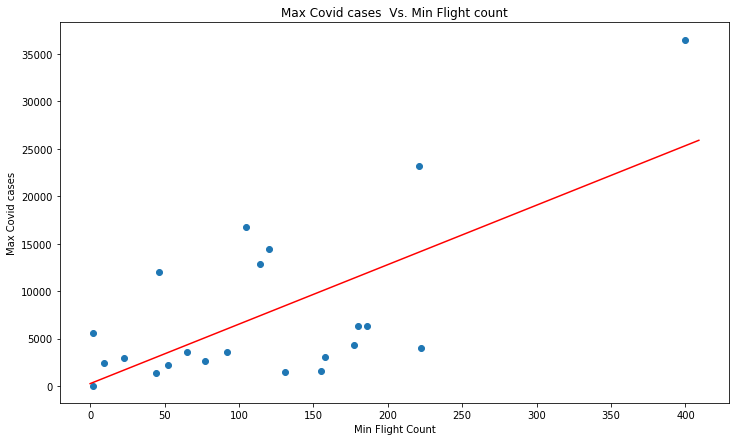

(0.6702767525665039, 0.0006418364347072213)


In [48]:
plot_flight_max_covid_min(1)

In [0]:
def plot_flight_avg_covid_threshold(base_start='2020-01-01', covid_threshold=2000, degree=1):
    base_start = datetime.strptime(base_start, '%Y-%m-%d')
    dts = []
    f = []
    for cit in covid_flight_count_data:
        first_index = get_first_index_with_value_greater_than(covid_flight_count_data[cit]['total_num'], covid_threshold)
        #f.append(np.average(covid_flight_count_data[cit]['flight_all']))
        if first_index < 0:
            #dts.append(200)
            continue
        case_start = datetime.strptime(covid_flight_count_data[cit]['all_dates'][first_index], '%Y-%m-%d')
        f.append(np.average(covid_flight_count_data[cit]['flight_all'][:first_index+1]))
        dts.append((case_start - base_start).days)
    print("Spearman's correlation: " + str(stats.pearsonr(f,dts)))
    train_and_plot_regression(f,dts,degree,'Avg. flight Count','Days taken to reach the Covid threshold', 'Number of days taken to reach the Covid threshold of {0} Vs. Flight Count till the day covid reached {0}'.format( str(covid_threshold)))

Spearman's correlation: (-0.663925845759847, 0.0019363640870013119)


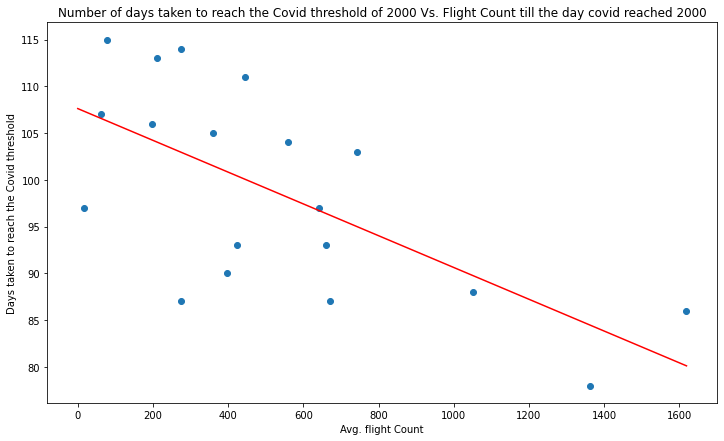

(-0.663925845759847, 0.0019363640870013119)


In [50]:
plot_flight_avg_covid_threshold(covid_threshold=2000)

In [0]:
def plot_flight_avg_roi_avg(degree=1):
    f = []
    c = []
    for cit in covid_flight_count_data:
        # if (np.max(covid_flight_count_data[cit]['total_num']) > 100000):
        #     continue
        f.append(np.average(covid_flight_count_data[cit]['flight_all']))
        c.append(np.average(covid_flight_count_data[cit]['rate_of_increase']))
    print("Spearman's correlation: " + str(stats.pearsonr(f,c)))
    train_and_plot_regression(f,c,degree,'Avg. Flight Count','Avg. Rate of increase','Rate of Increase Vs. Flight Count')

Spearman's correlation: (0.28341795004588066, 0.1900301109064001)


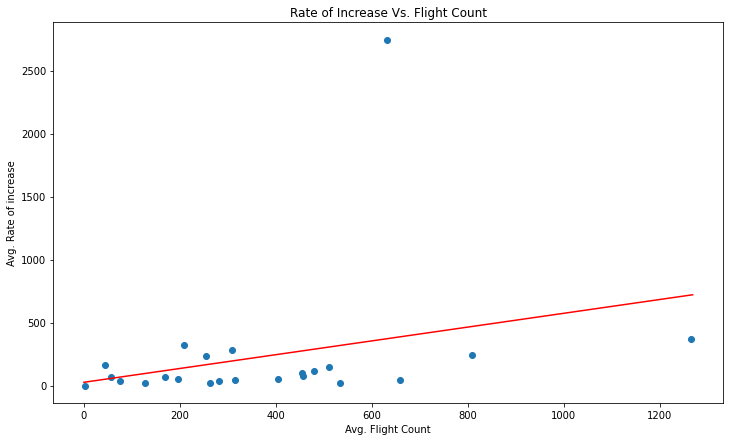

(0.28341795004588066, 0.1900301109064001)


In [52]:
plot_flight_avg_roi_avg()

In [53]:
for city in city_list:
  print(covid_flight_count_data[city]['all_dates'][0])

2020-02-01
2020-03-12
2020-01-24
2020-03-10
2020-03-06
2020-03-10
2020-03-23
2020-03-05
2020-03-06
2020-01-26
2020-03-11
2020-03-13
2020-03-08
2020-03-01
2020-03-10
2020-01-26
2020-02-25
2020-02-12
2020-02-10
2020-02-02
2020-01-31
2020-02-28
2020-03-07
